In [93]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Get data
data = pd.read_csv('data/Cars93.csv')

In [94]:
# Drop any column that is categorical or numeric
clean_data = data.copy()
clean_data = clean_data.drop(columns=['Model', 'Make'])

# Drop all na values
rows_to_remove = []
for i in range(len(clean_data)):
    if clean_data.iloc[i].isna().sum() > 0:
        rows_to_remove.append(i)
clean_data = clean_data.drop(index=rows_to_remove)

# Generate dummy variables for categorical features
categorical_cols = ['Manufacturer', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin']
for col in categorical_cols:
    this_dummy = pd.get_dummies(clean_data[col], drop_first=True)
    clean_data = clean_data.drop(columns=[col])
    clean_data = pd.concat([clean_data, this_dummy], axis=1)


In [95]:
# Make target MPG.highway
X = clean_data.copy().drop(columns='MPG.highway')
y = clean_data['MPG.highway'].copy()

# Get split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Form linear regression
reg = LinearRegression().fit(X_train, y_train)

# Predict values
prediction = reg.predict(X_test)

# Get residuals
residuals = y_test - reg.predict(X_test)

Coefficient of determination: -22.497414580238377


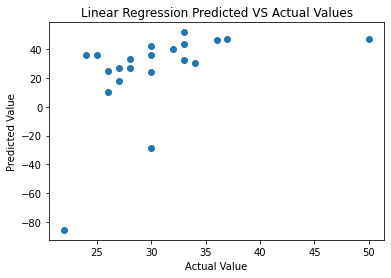

In [100]:
# Create graphic comparing actual and predicted values
fig1, ax1 = plt.subplots()
ax1.scatter(y_test, prediction)
ax1.set_xlabel('Actual Value')
ax1.set_ylabel('Predicted Value')
ax1.set_title('Linear Regression Predicted VS Actual Values')
print(f'Coefficient of determination: {reg.score(X_test, y_test)}')

Text(0.5, 1.0, 'Linear Regression Predicted VS Residuals')

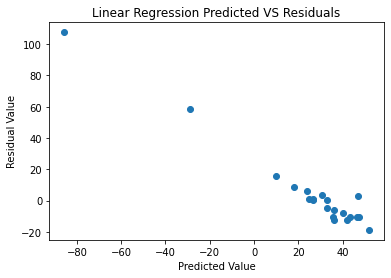

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(prediction, residuals)
ax2.set_xlabel('Predicted Value')
ax2.set_ylabel('Residual Value')
ax2.set_title('Linear Regression Predicted VS Residuals')

In [ ]:
print('y=')
i = 0
for coeff in reg.coef_:
    if ('-' in str(coeff)):
        print(f'  {coeff} * x_{i}')
    else:
        print(f'  +{coeff} * x_{i}')
    i += 1
print(f'  +{reg.intercept_}')

y=
  -2.0805505775389417 * x_0
  +10.166006897192664 * x_1
  -20.95240206564508 * x_2
  +10.176840256791277 * x_3
  +1.3225992230347052 * x_4
  +6.599174474981817 * x_5
  -0.16534351943271314 * x_6
  +0.0080170257176167 * x_7
  -0.0029594263330455783 * x_8
  -0.350997571253139 * x_9
  +4.866763178215351 * x_10
  +0.14049974839300236 * x_11
  +0.6916460213275415 * x_12
  -1.7041858729794643 * x_13
  +2.168350384966663 * x_14
  -1.1418456073399192 * x_15
  +0.04554451735018311 * x_16
  +0.00673292763062755 * x_17
  +11.036265592179655 * x_18
  +28.872439633257816 * x_19
  -60.423488681093886 * x_20
  -48.73295575462559 * x_21
  -41.851776123074025 * x_22
  -40.75412011867709 * x_23
  -33.508112762592674 * x_24
  -20.689283872353734 * x_25
  -16.54220899566856 * x_26
  +6.258799904235918 * x_27
  +83.61050230976146 * x_28
  +82.88827742913251 * x_29
  +92.89420937577187 * x_30
  -6.944933517161189e-09 * x_31
  +116.21302970564335 * x_32
  +31.378115124749204 * x_33
  +121.05139051348075 *